<a href="https://colab.research.google.com/github/Girovani/Hause_price_prediction/blob/main/House_Prices_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


In [ ]:
# Extracting the csv files from the zip available from the kaggle task
         
arq = zipfile.ZipFile('house-prices-advanced-regression-techniques.zip')
arq.extract('test.csv', 'test')
arq.extract('train.csv', 'train')
arq.extract('data_description.txt','readme') 
arq.close()


# This notebooks was created in colab, so if you are trying to run the code you will need do change the paths
# in order to it work properly 

In [ ]:
data_teste = pd.read_csv('test/test.csv')
data_treino = pd.read_csv('train/train.csv')
vs = data_treino.copy()

In [ ]:
data_treino.shape

(1460, 81)

In [ ]:
vs = data_treino.copy()

In [ ]:
vs.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
print(vs.describe())

                Id   MSSubClass  ...       YrSold      SalePrice
count  1460.000000  1460.000000  ...  1460.000000    1460.000000
mean    730.500000    56.897260  ...  2007.815753  180921.195890
std     421.610009    42.300571  ...     1.328095   79442.502883
min       1.000000    20.000000  ...  2006.000000   34900.000000
25%     365.750000    20.000000  ...  2007.000000  129975.000000
50%     730.500000    50.000000  ...  2008.000000  163000.000000
75%    1095.250000    70.000000  ...  2009.000000  214000.000000
max    1460.000000   190.000000  ...  2010.000000  755000.000000

[8 rows x 38 columns]


In [ ]:
vs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

As we can see, there are a lot of missing values, let's see how many they are:

In [ ]:
print('number of NA values')
for i in vs.columns:
  na = vs[i].isna().sum()
  print(i,':', na)

number of NA values
Id : 0
MSSubClass : 0
MSZoning : 0
LotFrontage : 259
LotArea : 0
Street : 0
Alley : 1369
LotShape : 0
LandContour : 0
Utilities : 0
LotConfig : 0
LandSlope : 0
Neighborhood : 0
Condition1 : 0
Condition2 : 0
BldgType : 0
HouseStyle : 0
OverallQual : 0
OverallCond : 0
YearBuilt : 0
YearRemodAdd : 0
RoofStyle : 0
RoofMatl : 0
Exterior1st : 0
Exterior2nd : 0
MasVnrType : 8
MasVnrArea : 8
ExterQual : 0
ExterCond : 0
Foundation : 0
BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinSF1 : 0
BsmtFinType2 : 38
BsmtFinSF2 : 0
BsmtUnfSF : 0
TotalBsmtSF : 0
Heating : 0
HeatingQC : 0
CentralAir : 0
Electrical : 1
1stFlrSF : 0
2ndFlrSF : 0
LowQualFinSF : 0
GrLivArea : 0
BsmtFullBath : 0
BsmtHalfBath : 0
FullBath : 0
HalfBath : 0
BedroomAbvGr : 0
KitchenAbvGr : 0
KitchenQual : 0
TotRmsAbvGrd : 0
Functional : 0
Fireplaces : 0
FireplaceQu : 690
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81
GarageCars : 0
GarageArea : 0
GarageQual : 81
GarageCond : 81
PavedDr

Now we can see better where these null values are and the quantity of them, but we are not going to deal with this for now, let's keep exploring the data.

In [ ]:
columns = list(vs.columns)
print(columns)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [ ]:
vs.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

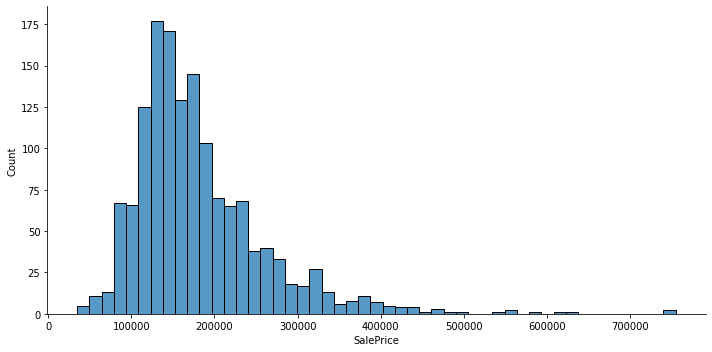

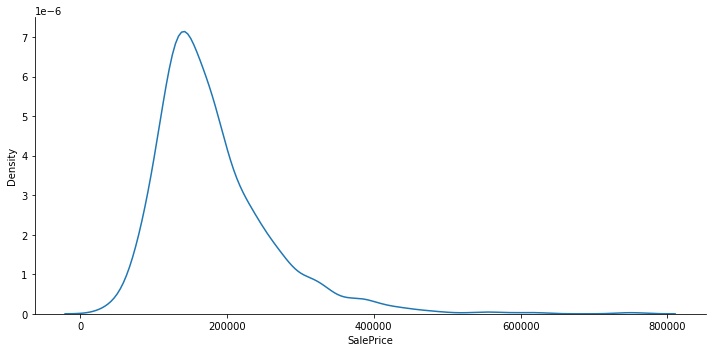

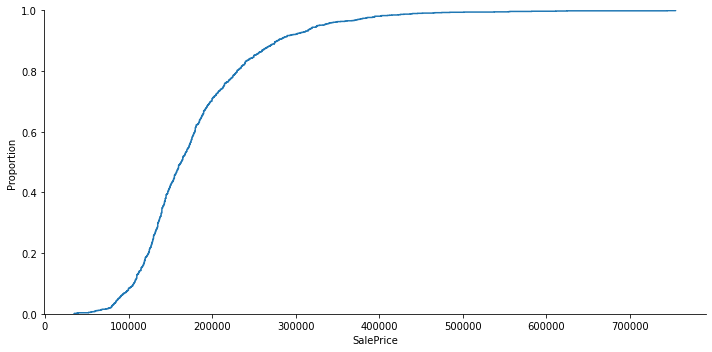

In [ ]:
sns.displot(vs.SalePrice, aspect=2)
sns.displot(vs.SalePrice, aspect=2,kind="kde")
sns.displot(vs.SalePrice, aspect=2,kind="ecdf")
plt.show()

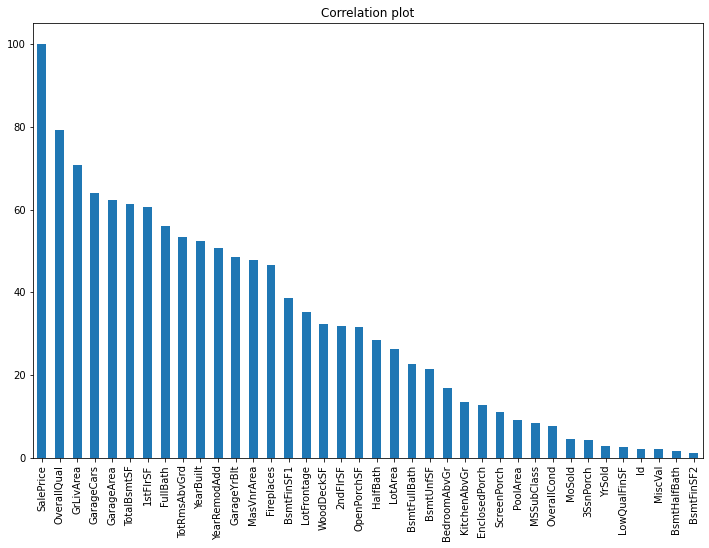

In [ ]:
df_corr = vs.corr().SalePrice
df_corr = df_corr*100
df_corr[df_corr < 0] = df_corr[df_corr < 0] * -1
plt.figure(figsize=(12,8))
df_corr.sort_values(ascending=False).plot(kind = "bar", title = "Correlation plot")
plt.show()

Now we have a idea of the correlation of each feature. For now let's solve the problem of the NA values.
The most os them can be explained with the data description file and all of them is NA because the house don't have this features


In [ ]:
df_obj = vs.select_dtypes(include='object') 
df_num = vs.select_dtypes(include=['int64','float64']) 

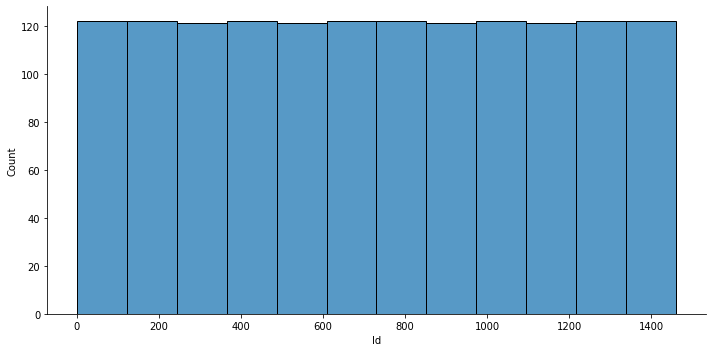

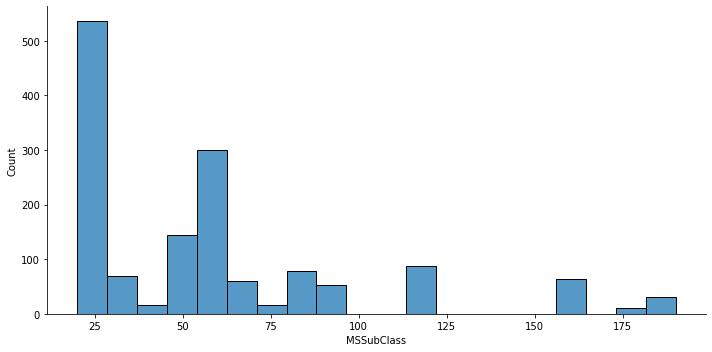

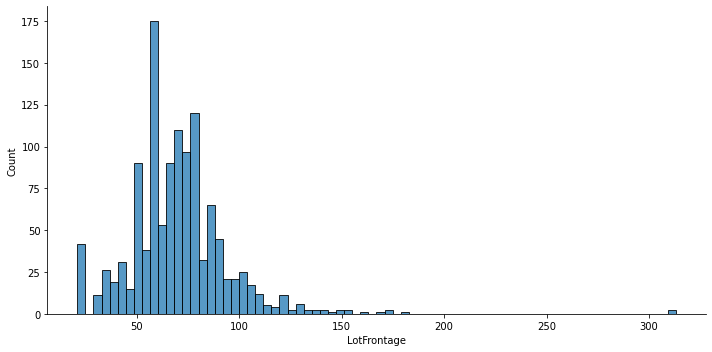

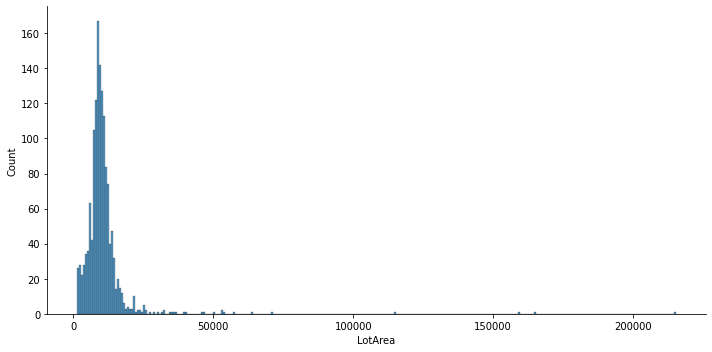

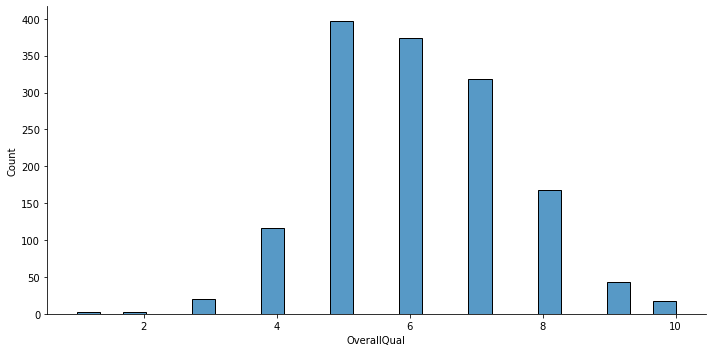

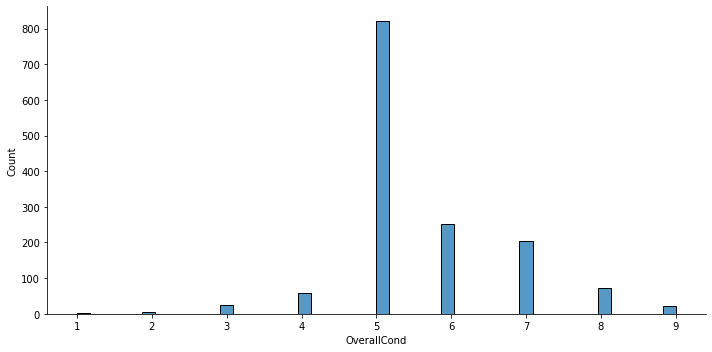

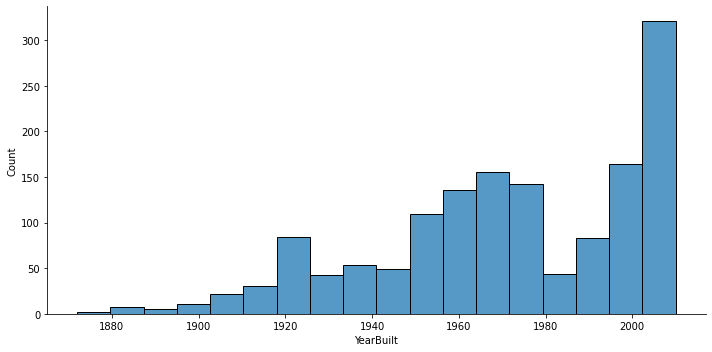

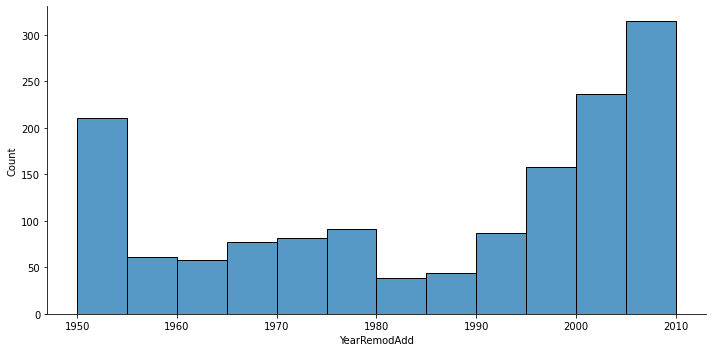

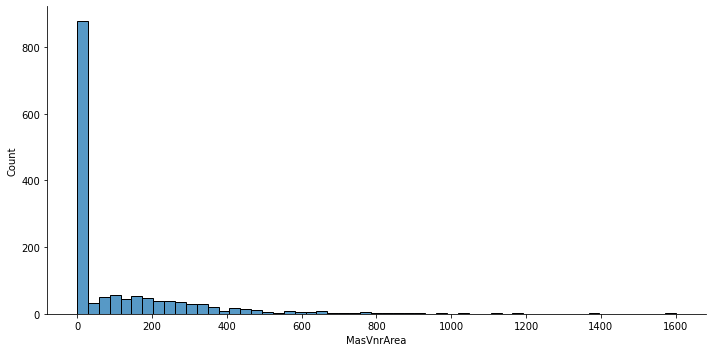

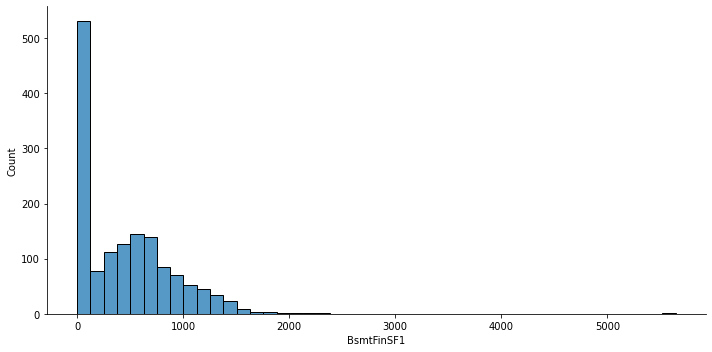

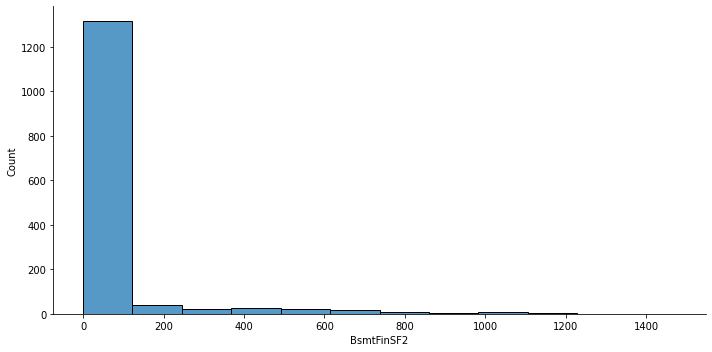

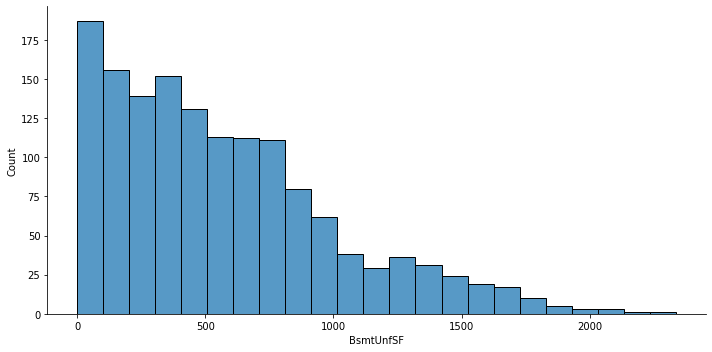

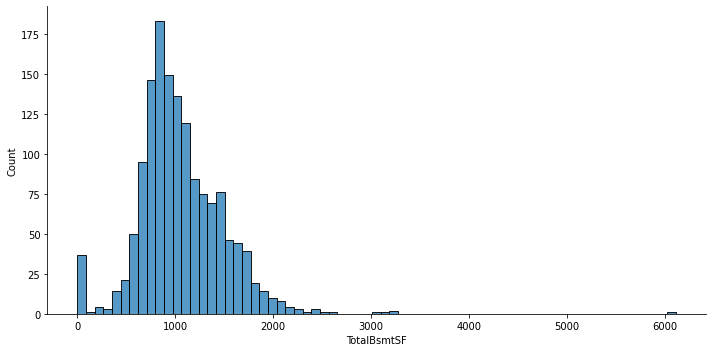

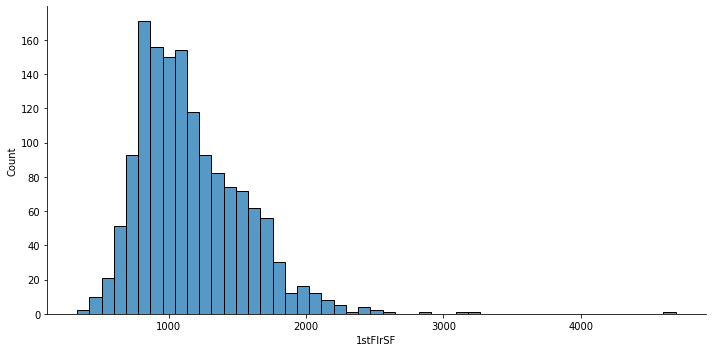

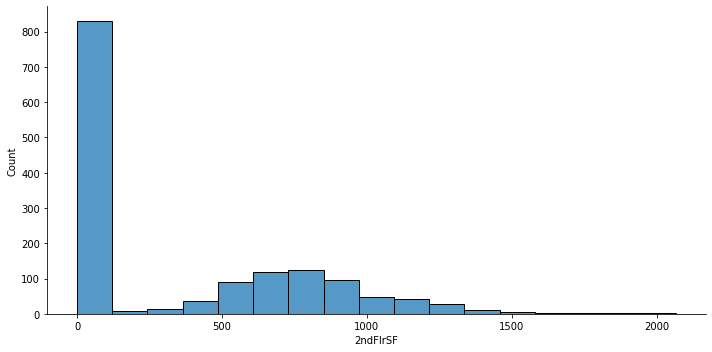

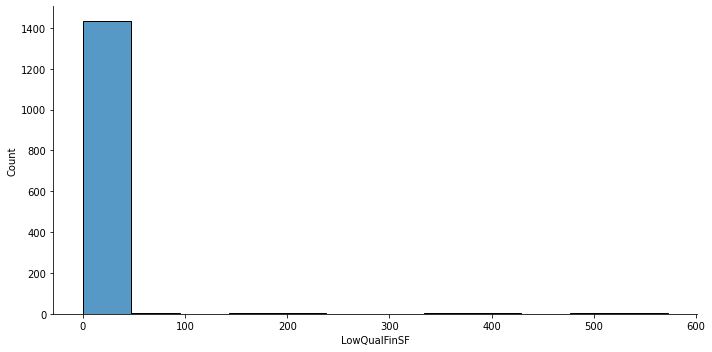

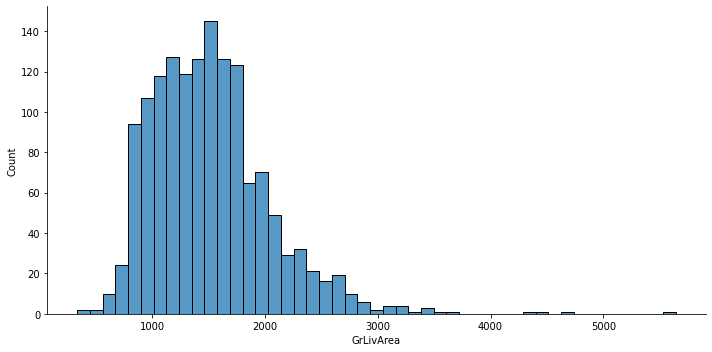

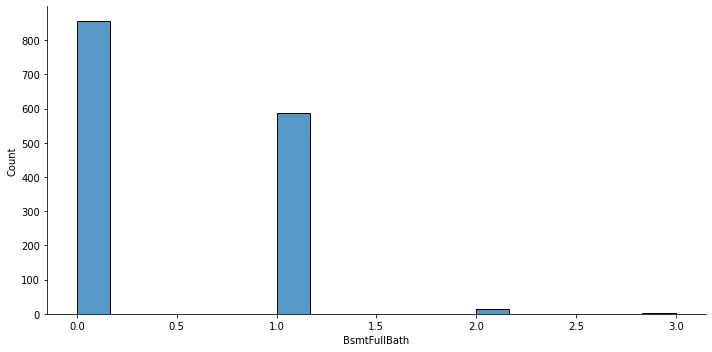

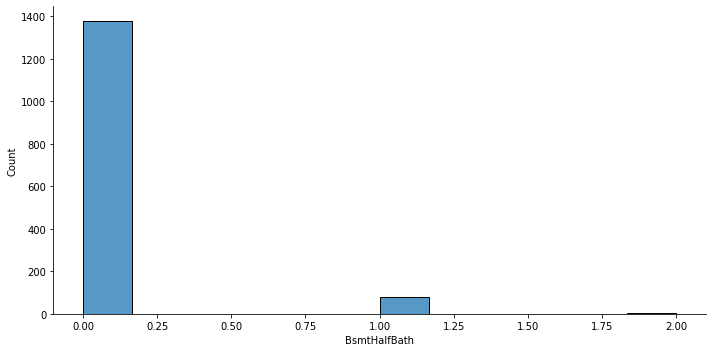

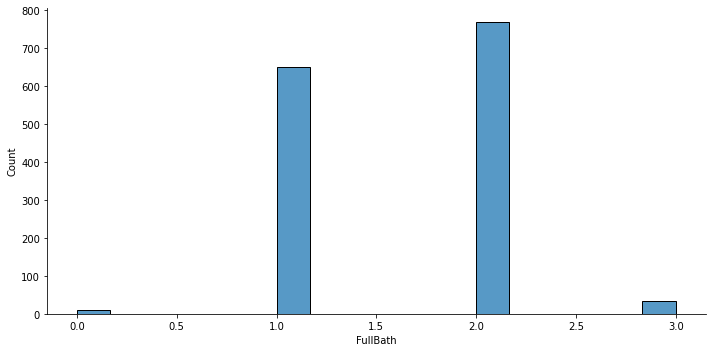

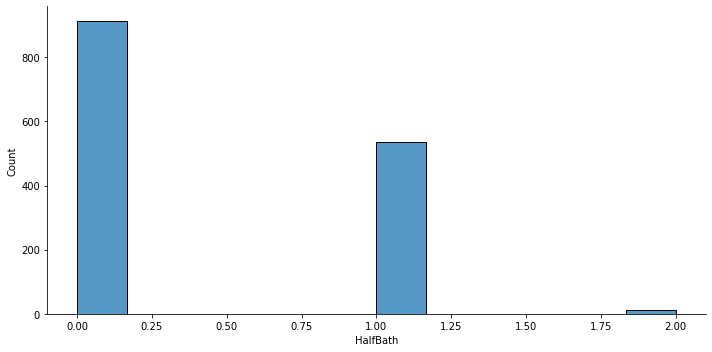

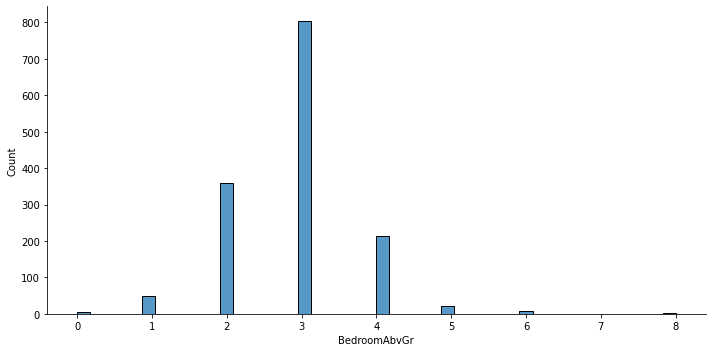

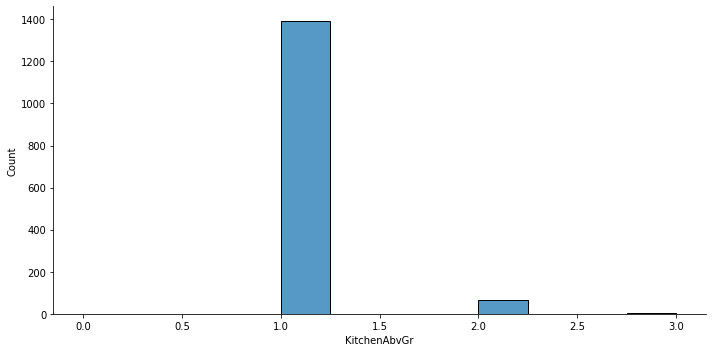

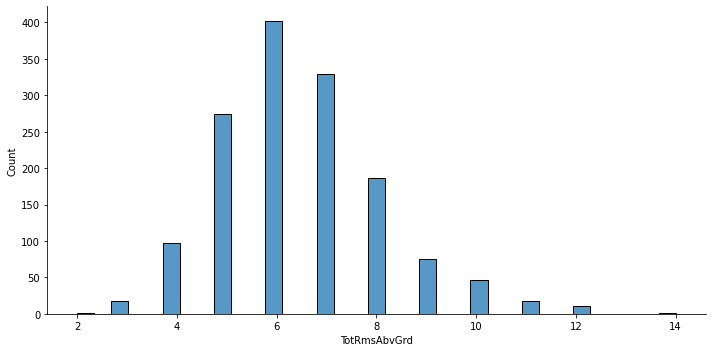

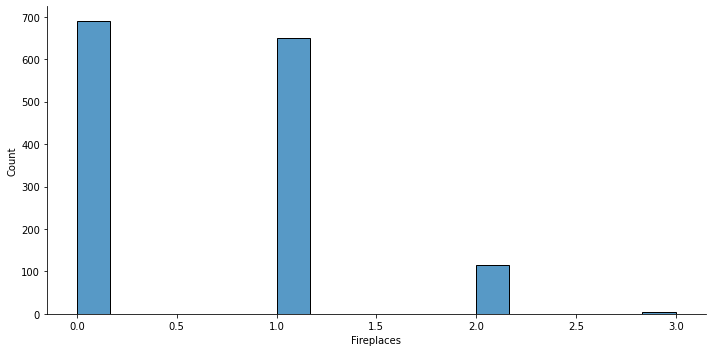

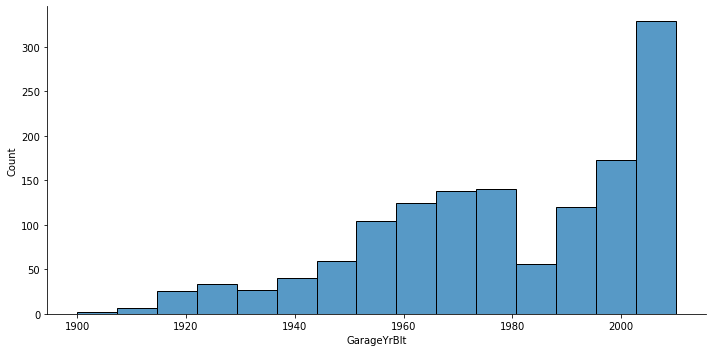

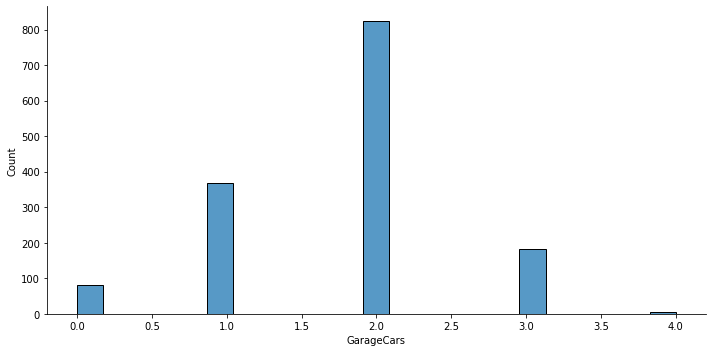

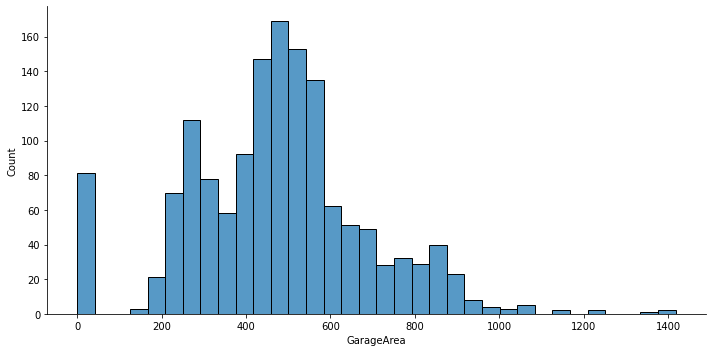

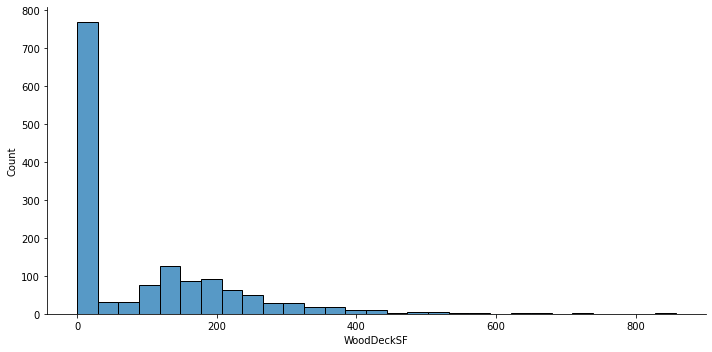

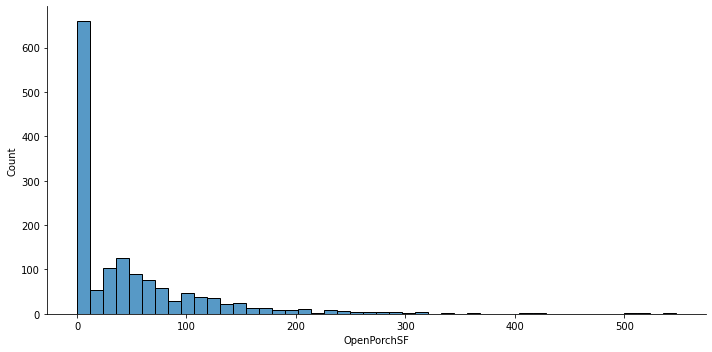

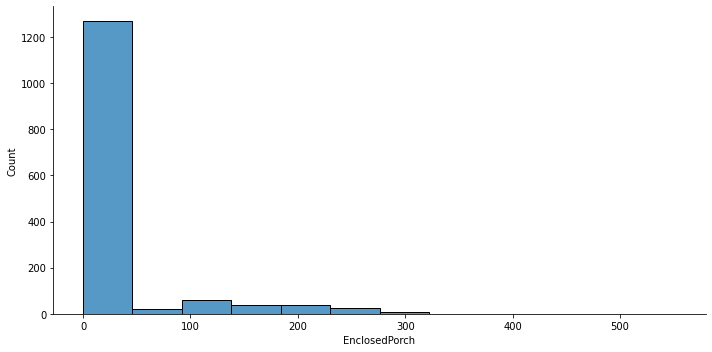

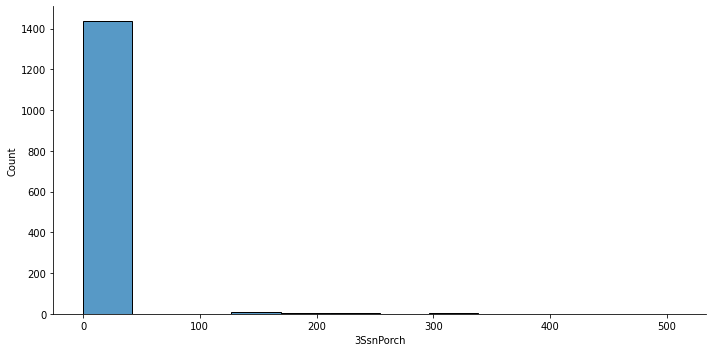

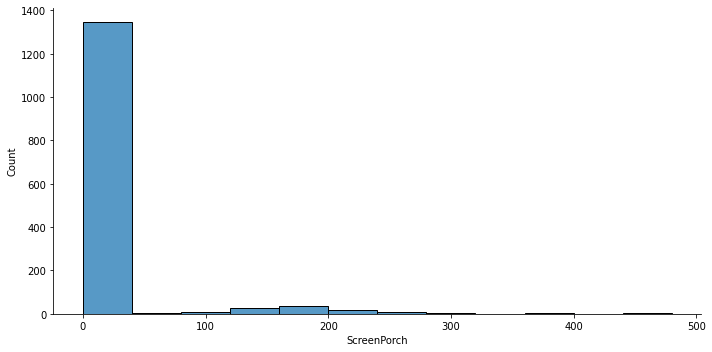

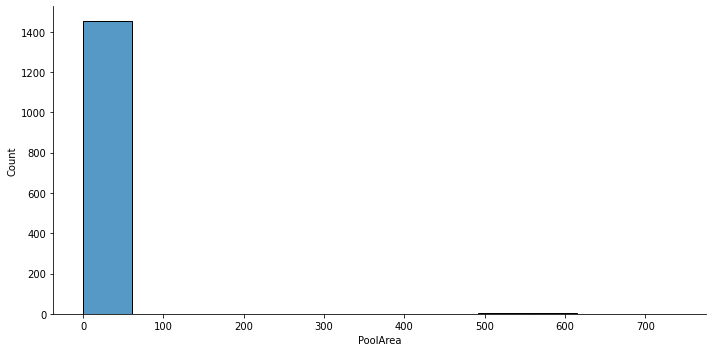

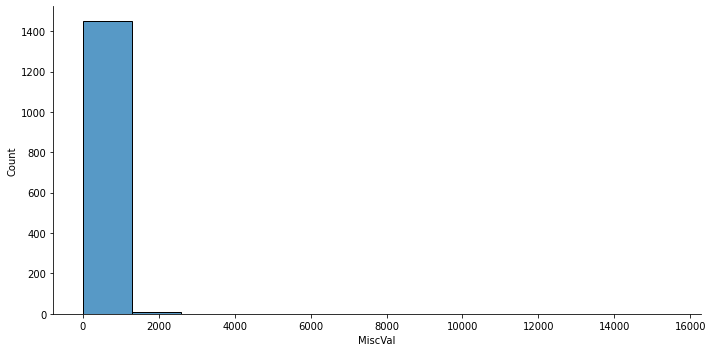

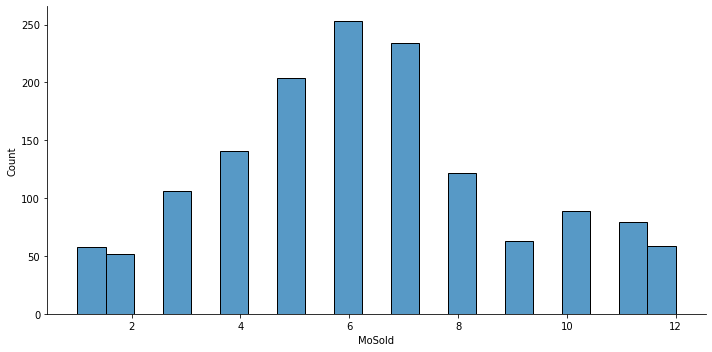

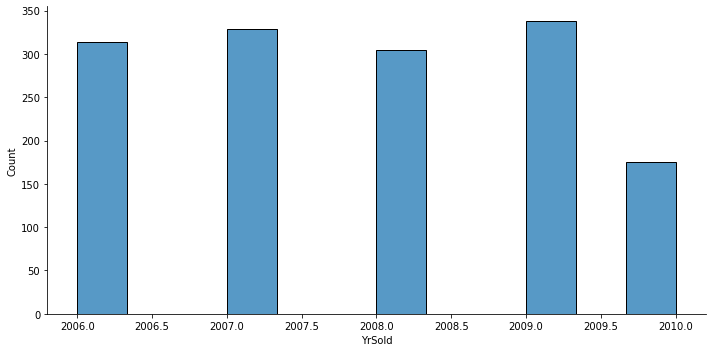

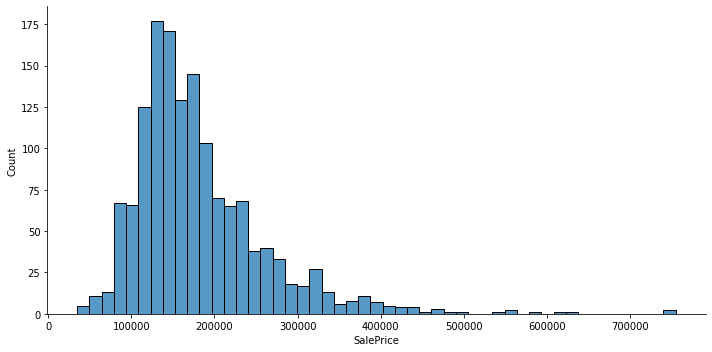

In [ ]:
for i in df_num:
  sns.displot(df_num[i], aspect=2)
  plt.show()

In [ ]:
lc = df_corr[df_corr < 25]
lc.keys() 
vs.drop(lc.keys(), axis=1,inplace=True)

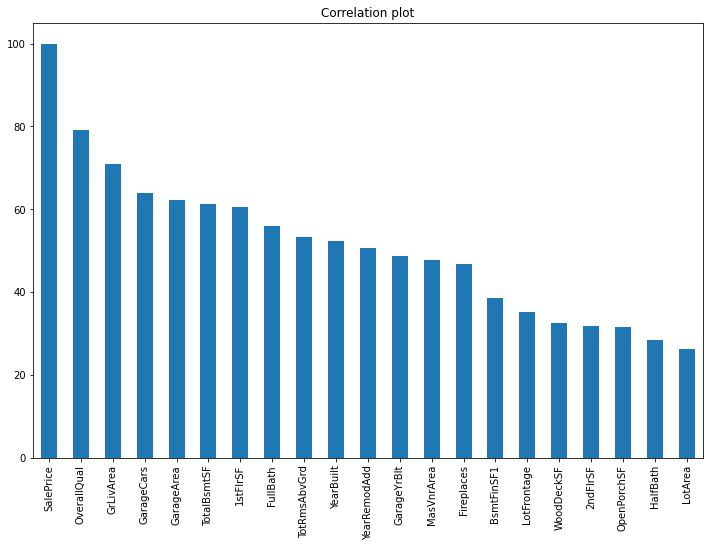

In [ ]:
df_corr = vs.corr().SalePrice
df_corr = df_corr*100
df_corr[df_corr < 0] = df_corr[df_corr < 0] * -1
plt.figure(figsize=(12,8))
df_corr.sort_values(ascending=False).plot(kind = "bar", title = "Correlation plot")
plt.show()

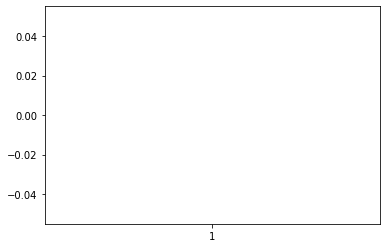

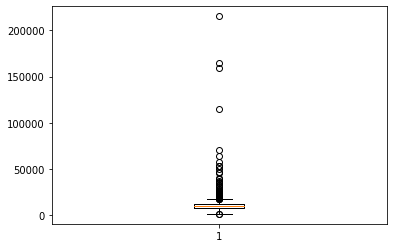

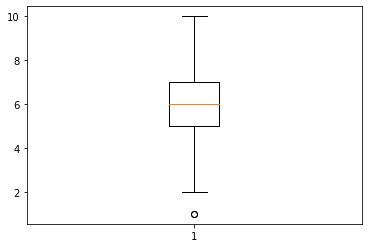

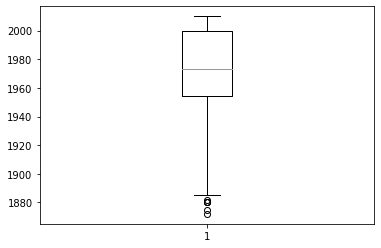

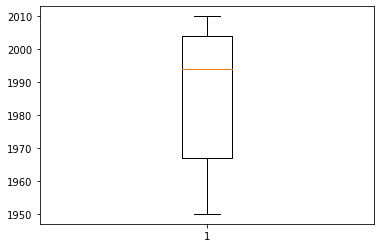

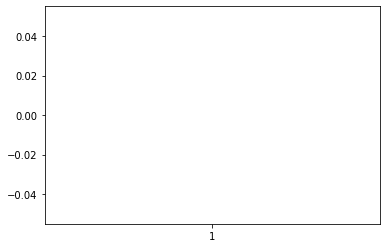

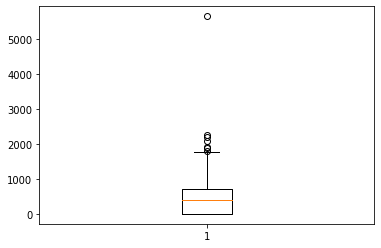

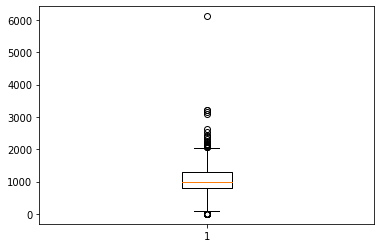

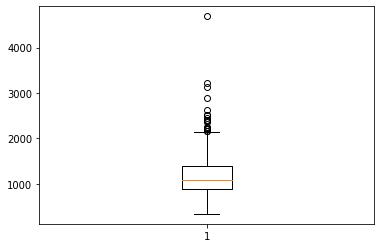

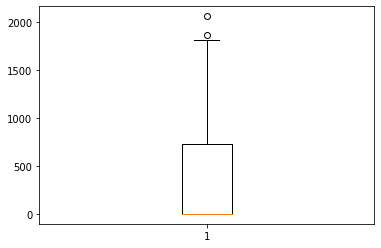

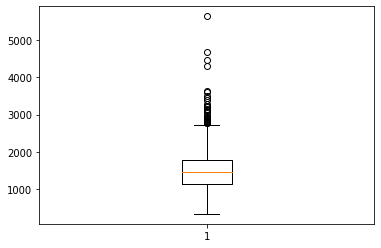

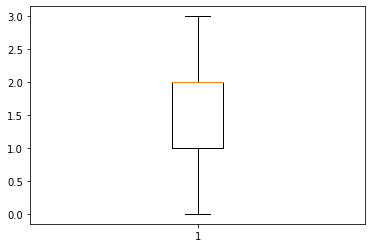

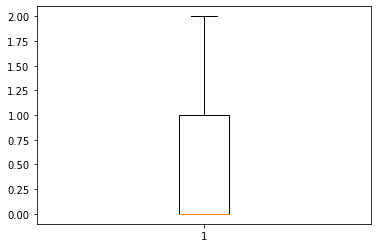

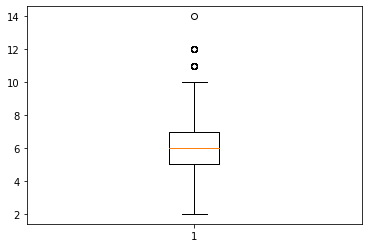

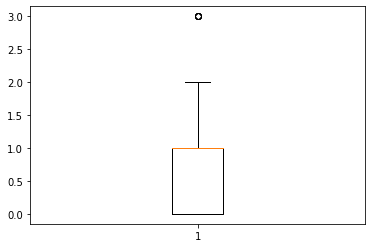

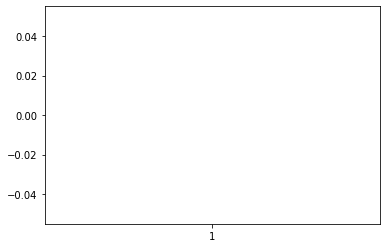

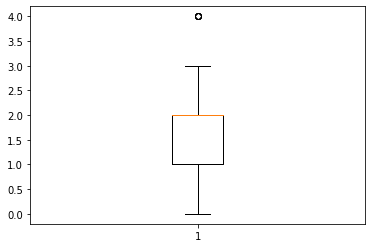

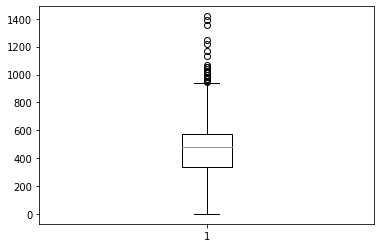

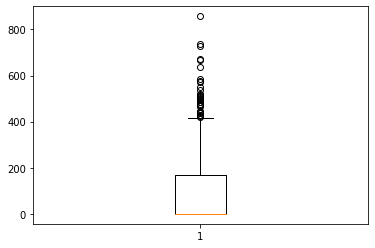

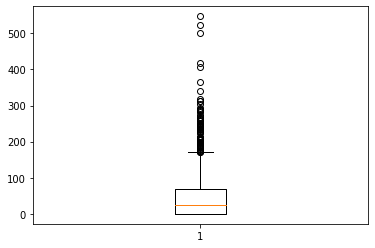

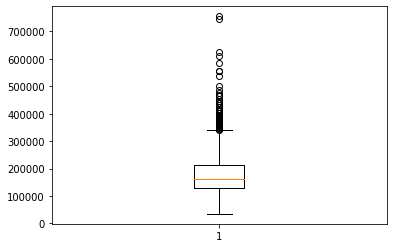

In [ ]:
for i in vs.select_dtypes(include=['int64','float64']) :
  plt.boxplot(vs[i])
  plt.show()

In [ ]:
l_obj = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
l_num = ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

In [ ]:
cat = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='constant', fill_value='0')),
                ('hot', OneHotEncoder(handle_unknown='ignore'))
])
num = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='mean')),
                ('std', StandardScaler())
])
full_tranformation = ColumnTransformer(transformers=[
                ('cat', cat, l_obj),
                ('num', num, l_num),])
final_pipe = Pipeline(steps=[
                ("full_tranformation", full_tranformation),
                ('reg', LinearRegression())
])

In [ ]:
X = data_treino.drop('SalePrice', axis=1)
y = data_treino.SalePrice
data_treino.drop(lc.keys(), axis=1,inplace=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg = final_pipe.fit(X_train,y_train)
reg.score(X_train, y_train)

0.9330149162120395

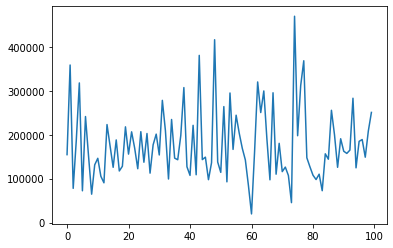

In [ ]:
std_score = reg.score(X_test, y_test)
pred = reg.predict(X_test)
plt.plot(pred[:100])

In [ ]:
pca_tranformation = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='mean')),
      ('pca', PCA())
])    
MinMax_tranformation = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='mean')),
      ('mm', MinMaxScaler())
])     
MaxAbs_tranformation = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='mean')),
      ('ma', MaxAbsScaler())
])                          
              
full_pca_tranformation = ColumnTransformer(transformers=[
                             ('cat', cat, l_obj),
                             ('pca', pca_tranformation, l_num),])
full_MinMax_tranformation = ColumnTransformer(transformers=[
                             ('cat', cat, l_obj),
                             ('mm', MinMax_tranformation, l_num),])
full_MaxAbs_tranformation = ColumnTransformer(transformers=[
                             ('cat', cat, l_obj),
                             ('ma', MaxAbs_tranformation, l_num),])                            

                               
final_pca_pipe = Pipeline(steps=[
                             ("full_pca_tranformation", full_pca_tranformation),
                             ('reg', LinearRegression())
])
final_MinMax_pipe = Pipeline(steps=[
                             ("full_MinMax_tranformation", full_MinMax_tranformation),
                             ('reg', LinearRegression())
])
final_MaxAbs_pipe = Pipeline(steps=[
                             ("full_MaxAbs_tranformation", full_MaxAbs_tranformation),
                             ('reg', LinearRegression())
])


reg2 = final_pca_pipe.fit(X_train,y_train)
reg3 = final_MinMax_pipe.fit(X_train,y_train)
reg4 = final_MaxAbs_pipe.fit(X_train,y_train)   
pca_score = reg2.score(X_test, y_test)
mm_score = reg3.score(X_test, y_test)
ma_score = reg4.score(X_test, y_test)                    

In [ ]:
print('std_score: ',std_score)
print('pca_score: ',pca_score)
print('mm_score: ',mm_score)
print('ma_score: ',ma_score)

std_score:  0.883492207616609
pca_score:  0.8829455840318351
mm_score:  0.883492109966178
ma_score:  0.883492092583638


In [ ]:
linear_MinMax_pipe = Pipeline(steps=[
                             ("full_MinMax_tranformation", full_MinMax_tranformation),
                             ('reg', LinearRegression())
                             ])
kn_MinMax_pipe = Pipeline(steps=[
                             ("full_MinMax_tranformation", full_MinMax_tranformation),
                             ('knr', KNeighborsRegressor(n_neighbors=5,))
                             ])
svm_MinMax_pipe = Pipeline(steps=[
                             ("full_MinMax_tranformation", full_MinMax_tranformation),
                             ('svm', svm.SVR(C=1,kernel='linear',max_iter=1000))
                             ])
log_MinMax_pipe = Pipeline(steps=[
                             ("full_MinMax_tranformation", full_MinMax_tranformation),
                             ('log', LogisticRegression(C=1,random_state=0,max_iter=600))
                             ])
linear_reg = linear_MinMax_pipe.fit(X_train,y_train)
kn_reg = kn_MinMax_pipe.fit(X_train,y_train)
svm_reg = svm_MinMax_pipe.fit(X_train,y_train)
log_reg = log_MinMax_pipe.fit(X_train,y_train)

In [ ]:
print('linear_reg: ',linear_reg.score(X_test, y_test))
print('kn_reg: ',kn_reg.score(X_test, y_test))
print('svm_reg: ',svm_reg.score(X_test, y_test))
print('log_reg: ',log_reg.score(X_test, y_test))

linear_reg:  0.883492109966178
kn_reg:  0.7807208075893762
svm_reg:  -0.003322515150741445
log_reg:  0.00228310502283105


In [ ]:
rf_MinMax_pipe = Pipeline(steps=[
                             ("rf_MinMax_tranformation", full_MinMax_tranformation),
                             ('rf', RandomForestRegressor(max_depth=9, random_state=42))
])
rf_reg = rf_MinMax_pipe.fit(X_train,y_train)
print('rf_reg: ',rf_reg.score(X_test, y_test))

rf_reg:  0.8961331813829374
